# Journey North Adult Sightings

In [34]:
#  Import and read
import pandas as pd 
import numpy as np
import json
# Sue Mottet 2-19-2022

# geoJSONifier

In [35]:
def df_to_geojson(df, properties, lat='latitude', lon='longitude'):
    # create a new python dict to contain our geojson data, using geojson format
    geojson = {'type':'FeatureCollection', 'features':[]}

    # loop through each row in the dataframe and convert each row to geojson format
    for _, row in df.iterrows():
        # create a feature template to fill in
        feature = {'type':'Feature',
                   'properties':{},
                   'geometry':{'type':'Point',
                               'coordinates':[]}}

        # fill in the coordinates
        feature['geometry']['coordinates'] = [row[lon],row[lat]]

        # for each column, get the value and add it as a new feature property
        for prop in properties:
            feature['properties'][prop] = row[prop]
        
        # add this feature (aka, converted dataframe row) to the list of features inside our dict
        geojson['features'].append(feature)
    
    return geojson

# Load file

In [36]:
JNorth1996_2020_df = pd.read_csv("../../resources/JNorth/UWMadisonArb_JNorth_Project_MonarchsAndMilkweed_1996-2020.csv")
JNorth1996_2020_df.head()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species
0,850841703,1996-12-16,Monarch Adult Sighted,1,27.594,-81.362,0,On the ballfield a solitary monarch butterfly ...,Walker memorial junior academy,10.0,-999999.999,135,-999999.999,1,Monarch Butterfly,1
1,851824801,1996-12-06,Monarch Adult Sighted,1,30.420,-87.224,0,Our 5th grade Discovery students who went alon...,Hambrick elementary school,5.0,-999999.999,150,-999999.999,1,Monarch Butterfly,1
2,854409931,1996-09-21,Monarch Adult Sighted,1,40.817,-96.710,0,We saw several hundred monarchs in our school ...,-999999.999,5.0,-999999.999,9701054,-999999.999,1,Monarch Butterfly,1
3,854557206,1996-09-21,Monarch Adult Sighted,1,40.817,-96.710,0,Over a hundered monarchs in our school butterf...,Fredstrom elementary school,6.0,-999999.999,175,-999999.999,1,Monarch Butterfly,1
4,855061862,1997-01-01,Monarch Adult Sighted,1,34.244,-77.946,0,"I Thought I Saw It, But I Was Suprised To See ...",Gregory,3.0,-999999.999,181,-999999.999,1,Monarch Butterfly,1


# Data Exploratory

In [37]:
JNorth1996_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227433 entries, 0 to 227432
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             227433 non-null  int64  
 1   sighting_date  227433 non-null  object 
 2   species        227433 non-null  object 
 3   number         227433 non-null  int64  
 4   latitude       227433 non-null  float64
 5   longitude      227433 non-null  float64
 6   flag_location  227433 non-null  int64  
 7   comments       227433 non-null  object 
 8   school         227433 non-null  object 
 9   grade          227433 non-null  float64
 10  image_url      227433 non-null  object 
 11  customerid     227433 non-null  int64  
 12  number_old     227433 non-null  float64
 13  flag_number    227433 non-null  int64  
 14  species_old    227433 non-null  object 
 15  flag_species   227433 non-null  int64  
dtypes: float64(4), int64(6), object(6)
memory usage: 27.8+ MB


In [38]:
str(JNorth1996_2020_df.columns.tolist())

"['id', 'sighting_date', 'species', 'number', 'latitude', 'longitude', 'flag_location', 'comments', 'school', 'grade', 'image_url', 'customerid', 'number_old', 'flag_number', 'species_old', 'flag_species']"

In [39]:
JNorth1996_2020_df.describe()

,id,number,latitude,longitude,flag_location,grade,customerid,number_old,flag_number,flag_species
count,2.274330e+05,2.274330e+05,227433.000000,227433.000000,227433.000000,227433.000000,2.274330e+05,2.274330e+05,227433.000000,227433.000000
mean,1.420650e+09,1.186529e+02,38.400690,-87.569965,0.598018,-907386.217597,9.451737e+06,-2.844270e+05,0.294816,0.130324
std,1.456887e+08,2.209080e+04,5.268651,10.880362,0.490299,289894.342744,2.193961e+06,4.518136e+05,0.467089,0.336660
min,8.508417e+08,-1.700000e+01,-12.100000,-165.107000,0.000000,-999999.999000,0.000000e+00,-1.000000e+06,0.000000,0.000000
25%,1.377751e+09,1.000000e+00,34.723000,-95.268000,0.000000,-999999.999000,9.941050e+06,-1.000000e+06,0.000000,0.000000
50%,1.477448e+09,1.000000e+00,39.503000,-86.787000,1.000000,-999999.999000,9.977663e+06,1.000000e+00,0.000000,0.000000
75%,1.526383e+09,3.000000e+00,42.409000,-79.255000,1.000000,-999999.999000,1.000029e+07,3.000000e+00,1.000000,0.000000
max,1.526525e+09,1.000000e+07,65.136000,-52.883000,1.000000,1112.000000,1.004256e+07,1.000000e+07,2.000000,1.000000


In [40]:
JNorth1996_2020_df.columns.tolist()

['id',
 'sighting_date',
 'species',
 'number',
 'latitude',
 'longitude',
 'flag_location',
 'comments',
 'school',
 'grade',
 'image_url',
 'customerid',
 'number_old',
 'flag_number',
 'species_old',
 'flag_species']

In [41]:
JNorth1996_2020_df.shape

(227433, 16)

In [42]:
# Determine the number of unique values in each column.
for col in JNorth1996_2020_df:
  print(JNorth1996_2020_df[col].unique())

[ 850841703  851824801  854409931 ... 1526524404 1526524405 1526525021]
['1996-12-16' '1996-12-06' '1996-09-21' ... '2020-12-29' '2020-12-30'
 '2020-12-31']
['Monarch Adult Sighted' 'Monarch Adult (FIRST sighted)'
 'Monarch Egg (FIRST sighted)' 'Monarch (OTHER Observations)'
 'Monarch Larva (FIRST sighted)' 'Monarch PEAK Migration'
 'Milkweed (FIRST sighted)' 'Monarch Fall Roost' 'Monarch Egg Sighted'
 'Monarch Larva Sighted' 'Monarch, Captive-Reared' 'Milkweed Sighted']
[       1      150       20       89       30     2000       50     7500
       23      200        5      300        4      100       71      120
      325       21       28     5000    20000       36       25        6
       54     1000      160       24       60       37        2     3000
  1000000       10  2000000       40       85       65       15        8
      500       14      112       75       80    15000       18    10000
      912   100000      400      800       12       35      600       16
    25000    

In [43]:
# Determine the number of unique values in each column.
for col in JNorth1996_2020_df:
  print(JNorth1996_2020_df[col].value_counts())

850841703     1
1526350827    1
1526350816    1
1526350817    1
1526350818    1
             ..
1432512422    1
1432519704    1
1432562236    1
1432562641    1
1526525021    1
Name: id, Length: 227433, dtype: int64
2018-08-22    392
2018-10-03    377
2018-09-06    353
2019-09-19    337
2018-09-12    335
             ... 
2015-12-31      1
2015-11-24      1
2015-11-22      1
2006-07-30      1
1996-12-16      1
Name: sighting_date, Length: 7491, dtype: int64
Monarch Adult Sighted            102306
Monarch Adult (FIRST sighted)     36409
Monarch Larva Sighted             17378
Monarch, Captive-Reared           14339
Monarch (OTHER Observations)      13581
Monarch Egg Sighted                8736
Milkweed (FIRST sighted)           8465
Monarch PEAK Migration             7689
Monarch Egg (FIRST sighted)        6876
Monarch Fall Roost                 5035
Monarch Larva (FIRST sighted)      4898
Milkweed Sighted                   1721
Name: species, dtype: int64
1       139319
2        24169
3

In [44]:
# Find null values
for column in JNorth1996_2020_df.columns:
   print(f"Column {column} has {JNorth1996_2020_df[column].isnull().sum()} null values")

Column id has 0 null values
Column sighting_date has 0 null values
Column species has 0 null values
Column number has 0 null values
Column latitude has 0 null values
Column longitude has 0 null values
Column flag_location has 0 null values
Column comments has 0 null values
Column school has 0 null values
Column grade has 0 null values
Column image_url has 0 null values
Column customerid has 0 null values
Column number_old has 0 null values
Column flag_number has 0 null values
Column species_old has 0 null values
Column flag_species has 0 null values


In [45]:
# Find duplicate entries
print(f"Duplicate entries: {JNorth1996_2020_df.duplicated().sum()}")

Duplicate entries: 0


In [46]:
# filtering by type of observation (Monarch Adult First Sighted)
JNorth_Adult_First_Site_df = JNorth1996_2020_df[JNorth1996_2020_df['species']=='Monarch Adult (FIRST sighted)']
JNorth_Adult_First_Site_df.head()

,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species
688,886471649,1998-02-01,Monarch Adult (FIRST sighted),1,29.957,-90.078,0,We saw 2 butterflies hatch this weekend. We b...,-999999.999,-999999.999,-999999.999,9704694,-999999.999,1,FIRST Monarch Butterfly,1
689,887033189,1998-02-08,Monarch Adult (FIRST sighted),1,30.894,-102.086,0,-999999.999,Iraan elementary,5.000,-999999.999,719,-999999.999,1,FIRST Monarch Butterfly,1
691,887158601,1998-01-17,Monarch Adult (FIRST sighted),1,28.529,-96.679,0,Netted and tagged Monarch female laying eggs o...,Victoria christian school,7.000,-999999.999,9704928,-999999.999,1,FIRST Monarch Butterfly,1
692,887283990,1998-02-12,Monarch Adult (FIRST sighted),1,28.529,-96.679,0,Have had a few Monarchs overwintering in this ...,Victoria christian school,7.000,-999999.999,9704928,-999999.999,1,FIRST Monarch Butterfly,1
694,887294257,1997-12-20,Monarch Adult (FIRST sighted),1,29.757,-95.365,0,Monarch’s have been sighted in backyards with ...,Kinkaid school,8.000,-999999.999,728,-999999.999,1,FIRST Monarch Butterfly,1


In [47]:
JNorth_Adult_First_Site_df.to_csv('JNorth_Adult_First_Site.csv', header=True, mode='w' )

In [49]:
JNorth_Adult_First_Site_df.shape

(36409, 16)

In [66]:
# Import dependencies.
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [67]:
# Let's make sure 'date' is actually a date in pandas
JNorth_Adult_First_Site_df = pd.DataFrame(JNorth_Adult_First_Site_df)
JNorth_Adult_First_Site_df["sighting_date"] = pd.to_datetime(JNorth_Adult_First_Site_df["sighting_date"])

date = JNorth_Adult_First_Site_df["sighting_date"]
value = JNorth_Adult_First_Site_df["number"]

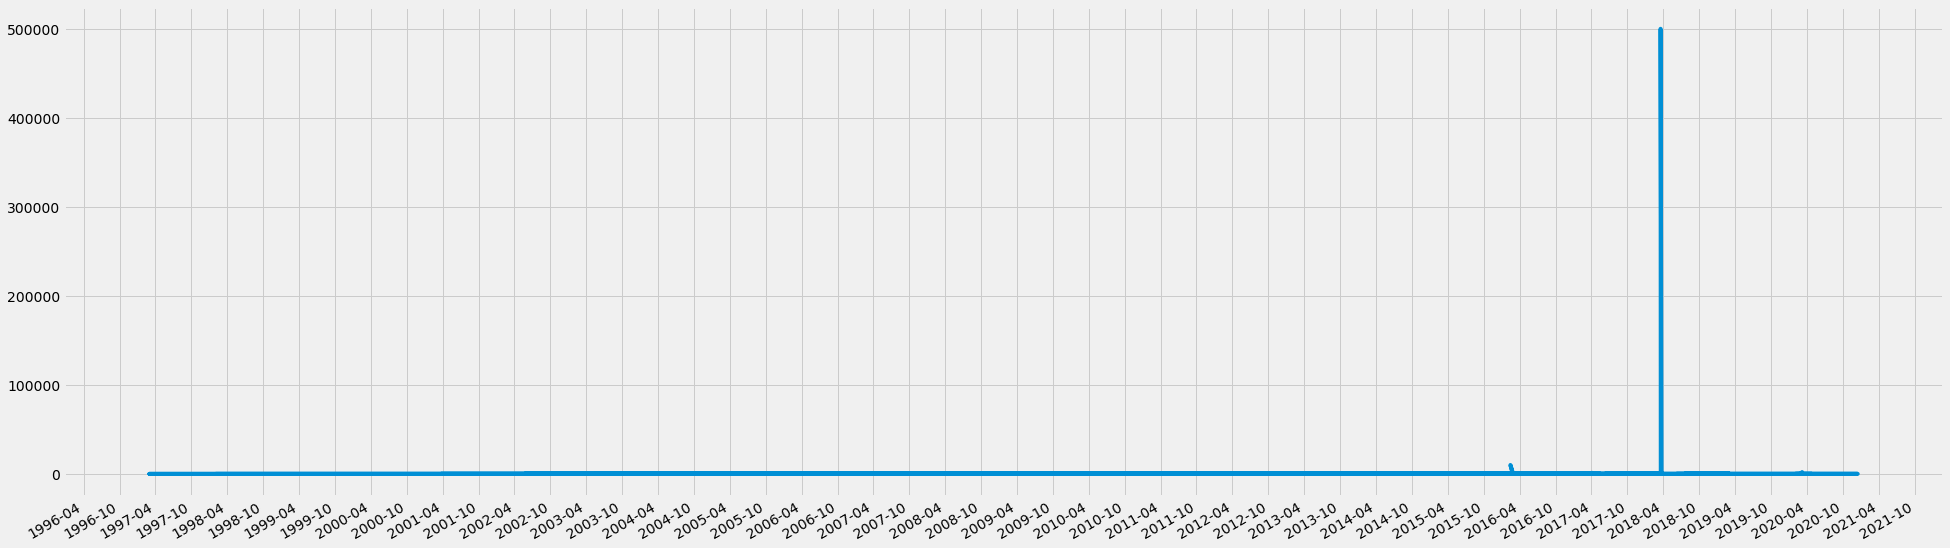

In [72]:
fig, ax = plt.subplots(figsize=(30, 10))

half_year_locator = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only

ax.plot(date, value);
fig.autofmt_xdate()

# Format file for geoJSON 

In [21]:
JNorth_Adult_First_Site_df.drop(['id','flag_location', 'comments','school','grade','image_url','customerid','number_old','flag_number','species_old','flag_species'], axis=1, inplace=True)
JNorth_Adult_First_Site_df.head()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,sighting_date,species,number,latitude,longitude
688,1998-02-01,Monarch Adult (FIRST sighted),1,29.957,-90.078
689,1998-02-08,Monarch Adult (FIRST sighted),1,30.894,-102.086
691,1998-01-17,Monarch Adult (FIRST sighted),1,28.529,-96.679
692,1998-02-12,Monarch Adult (FIRST sighted),1,28.529,-96.679
694,1997-12-20,Monarch Adult (FIRST sighted),1,29.757,-95.365


In [22]:
cols = ['sighting_date', 'species', 'number', 'latitude', 'longitude']

In [23]:
JNorth_Adult_First_Site_df =JNorth_Adult_First_Site_df.groupby(['sighting_date', 'species', 'latitude', 'longitude']).sum().reset_index()
JNorth_Adult_First_Site_df.head()

,sighting_date,species,latitude,longitude,number
0,1997-03-01,Monarch Adult (FIRST sighted),26.220,-98.490,1
1,1997-03-01,Monarch Adult (FIRST sighted),29.650,-94.850,1
2,1997-03-11,Monarch Adult (FIRST sighted),29.420,-95.350,1
3,1997-03-16,Monarch Adult (FIRST sighted),29.635,-95.635,1
4,1997-03-19,Monarch Adult (FIRST sighted),29.635,-95.635,1


In [24]:
JNorth_Adult_First_Site_df.columns.tolist()

['sighting_date', 'species', 'latitude', 'longitude', 'number']

In [26]:
JNorth_Adult_First_Site_df.head()

,sighting_date,species,latitude,longitude,number
0,1997-03-01,Monarch Adult (FIRST sighted),26.220,-98.490,1
1,1997-03-01,Monarch Adult (FIRST sighted),29.650,-94.850,1
2,1997-03-11,Monarch Adult (FIRST sighted),29.420,-95.350,1
3,1997-03-16,Monarch Adult (FIRST sighted),29.635,-95.635,1
4,1997-03-19,Monarch Adult (FIRST sighted),29.635,-95.635,1


In [27]:
JNorth_Adult_First_Site_df.shape

(35489, 5)

In [28]:
JNorth_Adult_First_Site_year_df = JNorth_Adult_First_Site_df
JNorth_Adult_First_Site_year_df['year'] = pd.DatetimeIndex(JNorth_Adult_First_Site_df['sighting_date']).year

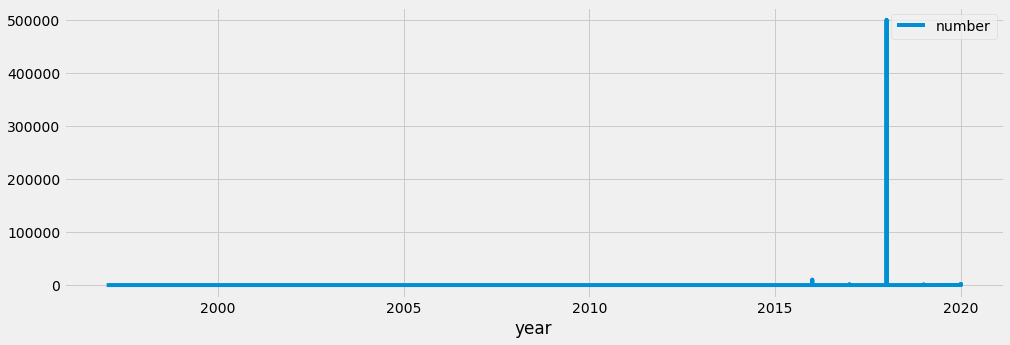

In [31]:
df = JNorth_Adult_First_Site_year_df

df.plot(figsize = (15,5), x ='year', y = ['number'])
# plt.show()

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


# 2016

In [32]:
JNorth_Adult_First_Site_2016_df = JNorth_Adult_First_Site_year_df[JNorth_Adult_First_Site_year_df['year']==2016]
JNorth_Adult_First_Site_2016_df.tail()

,sighting_date,species,latitude,longitude,number,year
25053,2016-08-03,Monarch Adult (FIRST sighted),45.135,-72.800,1,2016
25054,2016-08-08,Monarch Adult (FIRST sighted),43.326,-79.799,1,2016
25055,2016-08-08,Monarch Adult (FIRST sighted),44.542,-64.239,1,2016
25056,2016-08-15,Monarch Adult (FIRST sighted),42.026,-93.689,1,2016
25057,2016-10-26,Monarch Adult (FIRST sighted),33.838,-109.154,1,2016


In [33]:
JNorth_Adult_First_Site_2016_df.shape

(1663, 6)

In [462]:
JNorth_Adult_First_Site_2016_df['month'] = pd.DatetimeIndex(JNorth_Adult_First_Site_2016_df['sighting_date']).month

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## January

In [464]:
JNorth_Adult_First_Site_2016_1_df.shape

(2, 7)

In [ ]:
df = watch1993_Mexico_df[watch1993_Mexico_df['Location']=='Mil Cumbres']

df.plot(figsize = (20,5), x ='Report Season', y = ['number'])
# plt.show()

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

In [465]:
JNorth_Adult_First_Site_2016_1_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [466]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2016_1_df['latitude'] = JNorth_Adult_First_Site_2016_1_df['latitude'].astype(float)
JNorth_Adult_First_Site_2016_1_df['longitude'] = JNorth_Adult_First_Site_2016_1_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [467]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2016_1_df, cols)

In [468]:
file = open("JNorth_Adult_First_Site_2016_1.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## February

In [469]:
JNorth_Adult_First_Site_2016_month_df =pd.DataFrame(JNorth_Adult_First_Site_2016_df)
JNorth_Adult_First_Site_2016_2_df = JNorth_Adult_First_Site_2016_month_df[JNorth_Adult_First_Site_2016_month_df['month']==2]
JNorth_Adult_First_Site_2016_2_df.tail()

,sighting_date,species,latitude,longitude,number,year,month
3064,2016-02-25,Monarch Egg (FIRST sighted),29.757,-95.365,1,2016,2
3065,2016-02-26,Monarch Egg (FIRST sighted),32.784,-116.917,1,2016,2
3066,2016-02-26,Monarch Egg (FIRST sighted),34.214,-118.879,5,2016,2
3067,2016-02-28,Monarch Egg (FIRST sighted),34.168,-117.982,1,2016,2
3068,2016-02-29,Monarch Egg (FIRST sighted),29.920,-95.455,1,2016,2


In [470]:
JNorth_Adult_First_Site_2016_2_df.shape

(12, 7)

In [471]:
JNorth_Adult_First_Site_2016_2_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [472]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2016_2_df['latitude'] = JNorth_Adult_First_Site_2016_2_df['latitude'].astype(float)
JNorth_Adult_First_Site_2016_2_df['longitude'] = JNorth_Adult_First_Site_2016_2_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [473]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2016_2_df, cols)

In [474]:
file = open("JNorth_Adult_First_Site_2016_2.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## March

In [475]:
JNorth_Adult_First_Site_2016_month_df =pd.DataFrame(JNorth_Adult_First_Site_2016_df)
JNorth_Adult_First_Site_2016_3_df = JNorth_Adult_First_Site_2016_month_df[JNorth_Adult_First_Site_2016_month_df['month']==3]
JNorth_Adult_First_Site_2016_3_df.tail()

,sighting_date,species,latitude,longitude,number,year,month
3119,2016-03-30,Monarch Egg (FIRST sighted),33.020,-96.699,12,2016,3
3120,2016-03-30,Monarch Egg (FIRST sighted),34.186,-101.718,5,2016,3
3121,2016-03-31,Monarch Egg (FIRST sighted),27.951,-82.457,4,2016,3
3122,2016-03-31,Monarch Egg (FIRST sighted),29.857,-98.607,1,2016,3
3123,2016-03-31,Monarch Egg (FIRST sighted),29.980,-81.810,21,2016,3


In [476]:
JNorth_Adult_First_Site_2016_3_df.shape

(55, 7)

In [477]:
JNorth_Adult_First_Site_2016_3_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [478]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2016_3_df['latitude'] = JNorth_Adult_First_Site_2016_3_df['latitude'].astype(float)
JNorth_Adult_First_Site_2016_3_df['longitude'] = JNorth_Adult_First_Site_2016_3_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [479]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2016_3_df, cols)

In [480]:
file = open("JNorth_Adult_First_Site_2016_3.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## April

In [481]:
JNorth_Adult_First_Site_2016_month_df =pd.DataFrame(JNorth_Adult_First_Site_2016_df)
JNorth_Adult_First_Site_2016_4_df = JNorth_Adult_First_Site_2016_month_df[JNorth_Adult_First_Site_2016_month_df['month']==4]
JNorth_Adult_First_Site_2016_4_df.tail()

,sighting_date,species,latitude,longitude,number,year,month
3166,2016-04-27,Monarch Egg (FIRST sighted),32.985,-117.071,3,2016,4
3167,2016-04-28,Monarch Egg (FIRST sighted),30.047,-99.140,4,2016,4
3168,2016-04-28,Monarch Egg (FIRST sighted),32.779,-117.047,3,2016,4
3169,2016-04-28,Monarch Egg (FIRST sighted),37.063,-76.467,25,2016,4
3170,2016-04-30,Monarch Egg (FIRST sighted),36.100,-97.143,2,2016,4


In [482]:
JNorth_Adult_First_Site_2016_4_df.shape

(47, 7)

In [483]:
JNorth_Adult_First_Site_2016_4_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [484]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2016_4_df['latitude'] = JNorth_Adult_First_Site_2016_4_df['latitude'].astype(float)
JNorth_Adult_First_Site_2016_4_df['longitude'] = JNorth_Adult_First_Site_2016_4_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [485]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2016_4_df, cols)

In [486]:
file = open("JNorth_Adult_First_Site_2016_4.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## May

In [487]:
JNorth_Adult_First_Site_2016_month_df =pd.DataFrame(JNorth_Adult_First_Site_2016_df)
JNorth_Adult_First_Site_2016_5_df = JNorth_Adult_First_Site_2016_month_df[JNorth_Adult_First_Site_2016_month_df['month']==5]
JNorth_Adult_First_Site_2016_5_df.tail()

,sighting_date,species,latitude,longitude,number,year,month
3281,2016-05-31,Monarch Egg (FIRST sighted),43.326,-88.390,8,2016,5
3282,2016-05-31,Monarch Egg (FIRST sighted),44.519,-89.543,1,2016,5
3283,2016-05-31,Monarch Egg (FIRST sighted),44.812,-91.490,1,2016,5
3284,2016-05-31,Monarch Egg (FIRST sighted),44.904,-93.183,1,2016,5
3285,2016-05-31,Monarch Egg (FIRST sighted),44.910,-93.261,7,2016,5


In [488]:
JNorth_Adult_First_Site_2016_5_df.shape

(115, 7)

In [489]:
JNorth_Adult_First_Site_2016_5_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [490]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2016_5_df['latitude'] = JNorth_Adult_First_Site_2016_5_df['latitude'].astype(float)
JNorth_Adult_First_Site_2016_5_df['longitude'] = JNorth_Adult_First_Site_2016_5_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [491]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2016_5_df, cols)

In [492]:
file = open("JNorth_Adult_First_Site_2016_5.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## June

In [493]:
JNorth_Adult_First_Site_2016_month_df =pd.DataFrame(JNorth_Adult_First_Site_2016_df)
JNorth_Adult_First_Site_2016_6_df = JNorth_Adult_First_Site_2016_month_df[JNorth_Adult_First_Site_2016_month_df['month']==6]
JNorth_Adult_First_Site_2016_6_df.tail()

,sighting_date,species,latitude,longitude,number,year,month
3396,2016-06-29,Monarch Egg (FIRST sighted),41.995,-88.186,10,2016,6
3397,2016-06-29,Monarch Egg (FIRST sighted),42.045,-87.688,5,2016,6
3398,2016-06-30,Monarch Egg (FIRST sighted),30.691,-81.917,14,2016,6
3399,2016-06-30,Monarch Egg (FIRST sighted),36.223,-95.903,2,2016,6
3400,2016-06-30,Monarch Egg (FIRST sighted),41.850,-88.313,14,2016,6


In [494]:
JNorth_Adult_First_Site_2016_6_df.shape

(115, 7)

In [495]:
JNorth_Adult_First_Site_2016_6_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [496]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2016_6_df['latitude'] = JNorth_Adult_First_Site_2016_6_df['latitude'].astype(float)
JNorth_Adult_First_Site_2016_6_df['longitude'] = JNorth_Adult_First_Site_2016_6_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [497]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2016_6_df, cols)

In [498]:
file = open("JNorth_Adult_First_Site_2016_6.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## July

In [499]:
JNorth_Adult_First_Site_2016_month_df =pd.DataFrame(JNorth_Adult_First_Site_2016_df)
JNorth_Adult_First_Site_2016_7_df = JNorth_Adult_First_Site_2016_month_df[JNorth_Adult_First_Site_2016_month_df['month']==7]
JNorth_Adult_First_Site_2016_7_df.tail()

,sighting_date,species,latitude,longitude,number,year,month
3503,2016-07-27,Monarch Egg (FIRST sighted),43.735,-70.361,1,2016,7
3504,2016-07-28,Monarch Egg (FIRST sighted),42.636,-73.801,1,2016,7
3505,2016-07-28,Monarch Egg (FIRST sighted),43.402,-79.796,3,2016,7
3506,2016-07-29,Monarch Egg (FIRST sighted),42.580,-83.030,2,2016,7
3507,2016-07-31,Monarch Egg (FIRST sighted),40.092,-74.359,1,2016,7


In [500]:
JNorth_Adult_First_Site_2016_7_df.shape

(107, 7)

In [501]:
JNorth_Adult_First_Site_2016_7_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [502]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2016_7_df['latitude'] = JNorth_Adult_First_Site_2016_7_df['latitude'].astype(float)
JNorth_Adult_First_Site_2016_7_df['longitude'] = JNorth_Adult_First_Site_2016_7_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [503]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2016_7_df, cols)

In [504]:
file = open("JNorth_Adult_First_Site_2016_7.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## August

In [505]:
JNorth_Adult_First_Site_2016_month_df =pd.DataFrame(JNorth_Adult_First_Site_2016_df)
JNorth_Adult_First_Site_2016_8_df = JNorth_Adult_First_Site_2016_month_df[JNorth_Adult_First_Site_2016_month_df['month']==8]
JNorth_Adult_First_Site_2016_8_df.tail()

,sighting_date,species,latitude,longitude,number,year,month


In [506]:
JNorth_Adult_First_Site_2016_8_df.shape

(0, 7)

In [507]:
JNorth_Adult_First_Site_2016_8_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [508]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2016_8_df['latitude'] = JNorth_Adult_First_Site_2016_8_df['latitude'].astype(float)
JNorth_Adult_First_Site_2016_8_df['longitude'] = JNorth_Adult_First_Site_2016_8_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

In [509]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2016_8_df, cols)

In [510]:
file = open("JNorth_Adult_First_Site_2016_8.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## September

In [511]:
JNorth_Adult_First_Site_2016_month_df =pd.DataFrame(JNorth_Adult_First_Site_2016_df)
JNorth_Adult_First_Site_2016_9_df = JNorth_Adult_First_Site_2016_month_df[JNorth_Adult_First_Site_2016_month_df['month']==9]
JNorth_Adult_First_Site_2016_9_df.tail()

,sighting_date,species,latitude,longitude,number,year,month


In [512]:
JNorth_Adult_First_Site_2016_9_df.shape

(0, 7)

In [513]:
JNorth_Adult_First_Site_2016_9_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [514]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2016_9_df['latitude'] = JNorth_Adult_First_Site_2016_9_df['latitude'].astype(float)
JNorth_Adult_First_Site_2016_9_df['longitude'] = JNorth_Adult_First_Site_2016_9_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

In [515]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2016_9_df, cols)

In [516]:
file = open("JNorth_Adult_First_Site_2016_9.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## October

In [517]:
JNorth_Adult_First_Site_2016_month_df =pd.DataFrame(JNorth_Adult_First_Site_2016_df)
JNorth_Adult_First_Site_2016_10_df = JNorth_Adult_First_Site_2016_month_df[JNorth_Adult_First_Site_2016_month_df['month']==10]
JNorth_Adult_First_Site_2016_10_df.tail()

,sighting_date,species,latitude,longitude,number,year,month


In [518]:
JNorth_Adult_First_Site_2016_10_df.shape

(0, 7)

In [519]:
JNorth_Adult_First_Site_2016_10_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [520]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2016_10_df['latitude'] = JNorth_Adult_First_Site_2016_10_df['latitude'].astype(float)
JNorth_Adult_First_Site_2016_10_df['longitude'] = JNorth_Adult_First_Site_2016_10_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

In [521]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2016_10_df, cols)

In [522]:
file = open("JNorth_Adult_First_Site_2016_10.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## November

In [523]:
JNorth_Adult_First_Site_2016_month_df =pd.DataFrame(JNorth_Adult_First_Site_2016_df)
JNorth_Adult_First_Site_2016_11_df = JNorth_Adult_First_Site_2016_month_df[JNorth_Adult_First_Site_2016_month_df['month']==11]
JNorth_Adult_First_Site_2016_11_df.tail()

,sighting_date,species,latitude,longitude,number,year,month


In [524]:
JNorth_Adult_First_Site_2016_11_df.shape

(0, 7)

In [525]:
JNorth_Adult_First_Site_2016_11_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [526]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2016_11_df['latitude'] = JNorth_Adult_First_Site_2016_11_df['latitude'].astype(float)
JNorth_Adult_First_Site_2016_11_df['longitude'] = JNorth_Adult_First_Site_2016_11_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

In [527]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2016_11_df, cols)

In [528]:
file = open("JNorth_Adult_First_Site_2016_11.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## December

In [529]:
JNorth_Adult_First_Site_2016_month_df =pd.DataFrame(JNorth_Adult_First_Site_2016_df)
JNorth_Adult_First_Site_2016_12_df = JNorth_Adult_First_Site_2016_month_df[JNorth_Adult_First_Site_2016_month_df['month']==12]
JNorth_Adult_First_Site_2016_12_df.tail()

,sighting_date,species,latitude,longitude,number,year,month


In [530]:
JNorth_Adult_First_Site_2016_12_df.shape

(0, 7)

In [531]:
JNorth_Adult_First_Site_2016_12_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [532]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2016_12_df['latitude'] = JNorth_Adult_First_Site_2016_12_df['latitude'].astype(float)
JNorth_Adult_First_Site_2016_12_df['longitude'] = JNorth_Adult_First_Site_2016_12_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

In [533]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2016_12_df, cols)

In [534]:
file = open("JNorth_Adult_First_Site_2016_12.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

# 2017

In [535]:
JNorth_Adult_First_Site_2017_df = JNorth_Adult_First_Site_year_df[JNorth_Adult_First_Site_year_df['year']==2017]
JNorth_Adult_First_Site_2017_df.tail()

,sighting_date,species,latitude,longitude,number,year
4316,2017-07-29,Monarch Egg (FIRST sighted),36.108,-80.280,6,2017
4317,2017-07-29,Monarch Egg (FIRST sighted),40.699,-73.844,8,2017
4318,2017-07-30,Monarch Egg (FIRST sighted),38.813,-77.168,1,2017
4319,2017-07-30,Monarch Egg (FIRST sighted),42.870,-75.711,3,2017
4320,2017-07-31,Monarch Egg (FIRST sighted),42.789,-73.368,11,2017


In [536]:
JNorth_Adult_First_Site_2017_df.shape

(813, 6)

In [537]:
JNorth_Adult_First_Site_2017_df.drop(['year'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [538]:
JNorth_Adult_First_Site_2017_df.tail

<bound method NDFrame.tail of      sighting_date                      species  latitude  longitude  number
3508    2017-02-22  Monarch Egg (FIRST sighted)    30.080    -95.417      10
3509    2017-02-25  Monarch Egg (FIRST sighted)    31.174    -81.478       8
3510    2017-02-26  Monarch Egg (FIRST sighted)    29.031    -80.925       1
3511    2017-02-28  Monarch Egg (FIRST sighted)    30.175    -81.588       5
3512    2017-03-02  Monarch Egg (FIRST sighted)    26.570    -80.096       1
...            ...                          ...       ...        ...     ...
4316    2017-07-29  Monarch Egg (FIRST sighted)    36.108    -80.280       6
4317    2017-07-29  Monarch Egg (FIRST sighted)    40.699    -73.844       8
4318    2017-07-30  Monarch Egg (FIRST sighted)    38.813    -77.168       1
4319    2017-07-30  Monarch Egg (FIRST sighted)    42.870    -75.711       3
4320    2017-07-31  Monarch Egg (FIRST sighted)    42.789    -73.368      11

[813 rows x 5 columns]>

In [539]:
JNorth_Adult_First_Site_2017_df['month'] = pd.DatetimeIndex(JNorth_Adult_First_Site_2017_df['sighting_date']).month

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## January

In [540]:
JNorth_Adult_First_Site_2017_month_df =pd.DataFrame(JNorth_Adult_First_Site_2017_df)
JNorth_Adult_First_Site_2017_1_df = JNorth_Adult_First_Site_2017_month_df[JNorth_Adult_First_Site_2017_month_df['month']==1]
JNorth_Adult_First_Site_2017_1_df.tail()

,sighting_date,species,latitude,longitude,number,month


In [541]:
JNorth_Adult_First_Site_2017_1_df.shape

(0, 6)

In [542]:
JNorth_Adult_First_Site_2017_1_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [543]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2017_1_df['latitude'] = JNorth_Adult_First_Site_2017_1_df['latitude'].astype(float)
JNorth_Adult_First_Site_2017_1_df['longitude'] = JNorth_Adult_First_Site_2017_1_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

In [544]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2017_1_df, cols)

In [545]:
file = open("JNorth_Adult_First_Site_2017_1.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## February

In [546]:
JNorth_Adult_First_Site_2017_month_df =pd.DataFrame(JNorth_Adult_First_Site_2017_df)
JNorth_Adult_First_Site_2017_2_df = JNorth_Adult_First_Site_2017_month_df[JNorth_Adult_First_Site_2017_month_df['month']==2]
JNorth_Adult_First_Site_2017_2_df.tail()

,sighting_date,species,latitude,longitude,number,month
3508,2017-02-22,Monarch Egg (FIRST sighted),30.080,-95.417,10,2
3509,2017-02-25,Monarch Egg (FIRST sighted),31.174,-81.478,8,2
3510,2017-02-26,Monarch Egg (FIRST sighted),29.031,-80.925,1,2
3511,2017-02-28,Monarch Egg (FIRST sighted),30.175,-81.588,5,2


In [547]:
JNorth_Adult_First_Site_2017_2_df.shape

(4, 6)

In [548]:
JNorth_Adult_First_Site_2017_2_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [549]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2017_2_df['latitude'] = JNorth_Adult_First_Site_2017_2_df['latitude'].astype(float)
JNorth_Adult_First_Site_2017_2_df['longitude'] = JNorth_Adult_First_Site_2017_2_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [550]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2017_2_df, cols)

In [551]:
file = open("JNorth_Adult_First_Site_2017_2.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## March

In [552]:
JNorth_Adult_First_Site_2017_month_df =pd.DataFrame(JNorth_Adult_First_Site_2017_df)
JNorth_Adult_First_Site_2017_3_df = JNorth_Adult_First_Site_2017_month_df[JNorth_Adult_First_Site_2017_month_df['month']==3]
JNorth_Adult_First_Site_2017_3_df.tail()

,sighting_date,species,latitude,longitude,number,month
3564,2017-03-31,Monarch Egg (FIRST sighted),31.174,-81.477,6,3
3565,2017-03-31,Monarch Egg (FIRST sighted),32.931,-97.211,10,3
3566,2017-03-31,Monarch Egg (FIRST sighted),32.931,-96.460,1,3
3567,2017-03-31,Monarch Egg (FIRST sighted),34.829,-92.548,1,3
3568,2017-03-31,Monarch Egg (FIRST sighted),34.848,-92.544,25,3


In [553]:
JNorth_Adult_First_Site_2017_3_df.shape

(57, 6)

In [554]:
JNorth_Adult_First_Site_2017_3_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [555]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2017_3_df['latitude'] = JNorth_Adult_First_Site_2017_3_df['latitude'].astype(float)
JNorth_Adult_First_Site_2017_3_df['longitude'] = JNorth_Adult_First_Site_2017_3_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [556]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2017_3_df, cols)

In [557]:
file = open("JNorth_Adult_First_Site_2017_3.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## April

In [558]:
JNorth_Adult_First_Site_2017_month_df =pd.DataFrame(JNorth_Adult_First_Site_2017_df)
JNorth_Adult_First_Site_2017_4_df = JNorth_Adult_First_Site_2017_month_df[JNorth_Adult_First_Site_2017_month_df['month']==4]
JNorth_Adult_First_Site_2017_4_df.tail()

,sighting_date,species,latitude,longitude,number,month
3853,2017-04-29,Monarch Egg (FIRST sighted),36.323,-86.713,1,4
3854,2017-04-29,Monarch Egg (FIRST sighted),38.967,-76.853,9,4
3855,2017-04-29,Monarch Egg (FIRST sighted),39.636,-84.071,9,4
3856,2017-04-30,Monarch Egg (FIRST sighted),40.266,-83.213,1,4
3857,2017-04-30,Monarch Egg (FIRST sighted),41.317,-82.387,1,4


In [559]:
JNorth_Adult_First_Site_2017_4_df.shape

(289, 6)

In [560]:
JNorth_Adult_First_Site_2017_4_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [561]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2017_4_df['latitude'] = JNorth_Adult_First_Site_2017_4_df['latitude'].astype(float)
JNorth_Adult_First_Site_2017_4_df['longitude'] = JNorth_Adult_First_Site_2017_4_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [562]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2017_4_df, cols)

In [563]:
file = open("JNorth_Adult_First_Site_2017_4.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## May

In [564]:
JNorth_Adult_First_Site_2017_month_df =pd.DataFrame(JNorth_Adult_First_Site_2017_df)
JNorth_Adult_First_Site_2017_5_df = JNorth_Adult_First_Site_2017_month_df[JNorth_Adult_First_Site_2017_month_df['month']==5]
JNorth_Adult_First_Site_2017_5_df.tail()

,sighting_date,species,latitude,longitude,number,month
4055,2017-05-31,Monarch Egg (FIRST sighted),42.882,-79.062,4,5
4056,2017-05-31,Monarch Egg (FIRST sighted),43.636,-79.480,3,5
4057,2017-05-31,Monarch Egg (FIRST sighted),43.657,-79.420,7,5
4058,2017-05-31,Monarch Egg (FIRST sighted),44.743,-93.553,1,5
4059,2017-05-31,Monarch Egg (FIRST sighted),44.811,-91.498,2,5


In [565]:
JNorth_Adult_First_Site_2017_5_df.shape

(202, 6)

In [566]:
JNorth_Adult_First_Site_2017_5_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [567]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2017_5_df['latitude'] = JNorth_Adult_First_Site_2017_5_df['latitude'].astype(float)
JNorth_Adult_First_Site_2017_5_df['longitude'] = JNorth_Adult_First_Site_2017_5_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [568]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2017_5_df, cols)

In [569]:
file = open("JNorth_Adult_First_Site_2017_5.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## June

In [570]:
JNorth_Adult_First_Site_2017_month_df =pd.DataFrame(JNorth_Adult_First_Site_2017_df)
JNorth_Adult_First_Site_2017_6_df = JNorth_Adult_First_Site_2017_month_df[JNorth_Adult_First_Site_2017_month_df['month']==6]
JNorth_Adult_First_Site_2017_6_df.tail()

,sighting_date,species,latitude,longitude,number,month
4226,2017-06-29,Monarch Egg (FIRST sighted),41.233,-73.244,4,6
4227,2017-06-29,Monarch Egg (FIRST sighted),42.858,-92.540,1,6
4228,2017-06-30,Monarch Egg (FIRST sighted),39.376,-77.155,1,6
4229,2017-06-30,Monarch Egg (FIRST sighted),40.733,-73.567,1,6
4230,2017-06-30,Monarch Egg (FIRST sighted),42.368,-88.822,3,6


In [571]:
JNorth_Adult_First_Site_2017_6_df.shape

(171, 6)

In [572]:
JNorth_Adult_First_Site_2017_6_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [573]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2017_6_df['latitude'] = JNorth_Adult_First_Site_2017_6_df['latitude'].astype(float)
JNorth_Adult_First_Site_2017_6_df['longitude'] = JNorth_Adult_First_Site_2017_6_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [574]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2017_6_df, cols)

In [575]:
file = open("JNorth_Adult_First_Site_2017_6.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## July

In [576]:
JNorth_Adult_First_Site_2017_month_df =pd.DataFrame(JNorth_Adult_First_Site_2017_df)
JNorth_Adult_First_Site_2017_7_df = JNorth_Adult_First_Site_2017_month_df[JNorth_Adult_First_Site_2017_month_df['month']==7]
JNorth_Adult_First_Site_2017_7_df.tail()

,sighting_date,species,latitude,longitude,number,month
4316,2017-07-29,Monarch Egg (FIRST sighted),36.108,-80.280,6,7
4317,2017-07-29,Monarch Egg (FIRST sighted),40.699,-73.844,8,7
4318,2017-07-30,Monarch Egg (FIRST sighted),38.813,-77.168,1,7
4319,2017-07-30,Monarch Egg (FIRST sighted),42.870,-75.711,3,7
4320,2017-07-31,Monarch Egg (FIRST sighted),42.789,-73.368,11,7


In [577]:
JNorth_Adult_First_Site_2017_7_df.shape

(90, 6)

In [578]:
JNorth_Adult_First_Site_2017_7_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [579]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2017_7_df['latitude'] = JNorth_Adult_First_Site_2017_7_df['latitude'].astype(float)
JNorth_Adult_First_Site_2017_7_df['longitude'] = JNorth_Adult_First_Site_2017_7_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [580]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2017_7_df, cols)

In [581]:
file = open("JNorth_Adult_First_Site_2017_7.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## August

In [582]:
JNorth_Adult_First_Site_2017_month_df =pd.DataFrame(JNorth_Adult_First_Site_2017_df)
JNorth_Adult_First_Site_2017_8_df = JNorth_Adult_First_Site_2017_month_df[JNorth_Adult_First_Site_2017_month_df['month']==8]
JNorth_Adult_First_Site_2017_8_df.tail()

,sighting_date,species,latitude,longitude,number,month


In [583]:
JNorth_Adult_First_Site_2017_8_df.shape

(0, 6)

In [584]:
JNorth_Adult_First_Site_2017_8_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [585]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2017_8_df['latitude'] = JNorth_Adult_First_Site_2017_8_df['latitude'].astype(float)
JNorth_Adult_First_Site_2017_8_df['longitude'] = JNorth_Adult_First_Site_2017_8_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

In [586]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2017_8_df, cols)

In [587]:
file = open("JNorth_Adult_First_Site_2017_8.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## September

In [588]:
JNorth_Adult_First_Site_2017_month_df =pd.DataFrame(JNorth_Adult_First_Site_2017_df)
JNorth_Adult_First_Site_2017_9_df = JNorth_Adult_First_Site_2017_month_df[JNorth_Adult_First_Site_2017_month_df['month']==9]
JNorth_Adult_First_Site_2017_9_df.tail()

,sighting_date,species,latitude,longitude,number,month


In [589]:
JNorth_Adult_First_Site_2017_9_df.shape

(0, 6)

In [590]:
JNorth_Adult_First_Site_2017_9_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [591]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2017_9_df['latitude'] = JNorth_Adult_First_Site_2017_9_df['latitude'].astype(float)
JNorth_Adult_First_Site_2017_9_df['longitude'] = JNorth_Adult_First_Site_2017_9_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

In [592]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2017_9_df, cols)

In [593]:
file = open("JNorth_Adult_First_Site_2017_9.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## October

In [594]:
JNorth_Adult_First_Site_2017_month_df =pd.DataFrame(JNorth_Adult_First_Site_2017_df)
JNorth_Adult_First_Site_2017_10_df = JNorth_Adult_First_Site_2017_month_df[JNorth_Adult_First_Site_2017_month_df['month']==10]
JNorth_Adult_First_Site_2017_10_df.tail()

,sighting_date,species,latitude,longitude,number,month


In [595]:
JNorth_Adult_First_Site_2017_10_df.shape

(0, 6)

In [596]:
JNorth_Adult_First_Site_2017_10_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [597]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2017_10_df['latitude'] = JNorth_Adult_First_Site_2017_10_df['latitude'].astype(float)
JNorth_Adult_First_Site_2017_10_df['longitude'] = JNorth_Adult_First_Site_2017_10_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

In [598]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2017_10_df, cols)

In [599]:
file = open("JNorth_Adult_First_Site_2017_10.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## November

In [600]:
JNorth_Adult_First_Site_2017_month_df =pd.DataFrame(JNorth_Adult_First_Site_2017_df)
JNorth_Adult_First_Site_2017_11_df = JNorth_Adult_First_Site_2017_month_df[JNorth_Adult_First_Site_2017_month_df['month']==11]
JNorth_Adult_First_Site_2017_11_df.tail()

,sighting_date,species,latitude,longitude,number,month


In [601]:
JNorth_Adult_First_Site_2017_11_df.shape

(0, 6)

In [602]:
JNorth_Adult_First_Site_2017_11_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [603]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2017_11_df['latitude'] = JNorth_Adult_First_Site_2017_11_df['latitude'].astype(float)
JNorth_Adult_First_Site_2017_11_df['longitude'] = JNorth_Adult_First_Site_2017_11_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

In [604]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2017_11_df, cols)

In [605]:
file = open("JNorth_Adult_First_Site_2017_11.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## December

In [606]:
JNorth_Adult_First_Site_2017_month_df =pd.DataFrame(JNorth_Adult_First_Site_2017_df)
JNorth_Adult_First_Site_2017_12_df = JNorth_Adult_First_Site_2017_month_df[JNorth_Adult_First_Site_2017_month_df['month']==12]
JNorth_Adult_First_Site_2017_12_df.tail()

,sighting_date,species,latitude,longitude,number,month


In [607]:
JNorth_Adult_First_Site_2017_12_df.shape

(0, 6)

In [608]:
JNorth_Adult_First_Site_2017_12_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [609]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2017_12_df['latitude'] = JNorth_Adult_First_Site_2017_12_df['latitude'].astype(float)
JNorth_Adult_First_Site_2017_12_df['longitude'] = JNorth_Adult_First_Site_2017_12_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

In [610]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2017_12_df, cols)

In [611]:
file = open("JNorth_Adult_First_Site_2017_12.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

# 2018

In [612]:
JNorth_Adult_First_Site_2018_df = JNorth_Adult_First_Site_year_df[JNorth_Adult_First_Site_year_df['year']==2018]
JNorth_Adult_First_Site_2018_df.tail()

,sighting_date,species,latitude,longitude,number,year
5047,2018-07-29,Monarch Egg (FIRST sighted),45.056,-72.838,2,2018
5048,2018-07-30,Monarch Egg (FIRST sighted),43.911,-69.821,6,2018
5049,2018-07-30,Monarch Egg (FIRST sighted),44.136,-73.076,2,2018
5050,2018-07-31,Monarch Egg (FIRST sighted),36.152,-95.904,3,2018
5051,2018-07-31,Monarch Egg (FIRST sighted),40.175,-74.923,1,2018


In [613]:
JNorth_Adult_First_Site_2018_df.shape

(731, 6)

In [614]:
JNorth_Adult_First_Site_2018_df.drop(['year'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [615]:
JNorth_Adult_First_Site_2018_df.tail

<bound method NDFrame.tail of      sighting_date                      species  latitude  longitude  number
4321    2018-01-19  Monarch Egg (FIRST sighted)    34.238   -118.530       5
4322    2018-02-01  Monarch Egg (FIRST sighted)    20.660   -103.436      33
4323    2018-02-10  Monarch Egg (FIRST sighted)    38.114   -122.601       1
4324    2018-02-16  Monarch Egg (FIRST sighted)    28.538    -81.379       5
4325    2018-02-20  Monarch Egg (FIRST sighted)    28.468    -80.821      10
...            ...                          ...       ...        ...     ...
5047    2018-07-29  Monarch Egg (FIRST sighted)    45.056    -72.838       2
5048    2018-07-30  Monarch Egg (FIRST sighted)    43.911    -69.821       6
5049    2018-07-30  Monarch Egg (FIRST sighted)    44.136    -73.076       2
5050    2018-07-31  Monarch Egg (FIRST sighted)    36.152    -95.904       3
5051    2018-07-31  Monarch Egg (FIRST sighted)    40.175    -74.923       1

[731 rows x 5 columns]>

In [616]:
JNorth_Adult_First_Site_2018_df['month'] = pd.DatetimeIndex(JNorth_Adult_First_Site_2018_df['sighting_date']).month

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## January

In [617]:
JNorth_Adult_First_Site_2018_month_df =pd.DataFrame(JNorth_Adult_First_Site_2018_df)
JNorth_Adult_First_Site_2018_1_df = JNorth_Adult_First_Site_2018_month_df[JNorth_Adult_First_Site_2018_month_df['month']==1]
JNorth_Adult_First_Site_2018_1_df.tail()

,sighting_date,species,latitude,longitude,number,month
4321,2018-01-19,Monarch Egg (FIRST sighted),34.238,-118.53,5,1


In [618]:
JNorth_Adult_First_Site_2018_1_df.shape

(1, 6)

In [619]:
JNorth_Adult_First_Site_2018_1_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [620]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2018_1_df['latitude'] = JNorth_Adult_First_Site_2018_1_df['latitude'].astype(float)
JNorth_Adult_First_Site_2018_1_df['longitude'] = JNorth_Adult_First_Site_2018_1_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [621]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2018_1_df, cols)

In [622]:
file = open("JNorth_Adult_First_Site_2018_1.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## February

In [623]:
JNorth_Adult_First_Site_2018_month_df =pd.DataFrame(JNorth_Adult_First_Site_2018_df)
JNorth_Adult_First_Site_2018_2_df = JNorth_Adult_First_Site_2018_month_df[JNorth_Adult_First_Site_2018_month_df['month']==2]
JNorth_Adult_First_Site_2018_2_df.tail()

,sighting_date,species,latitude,longitude,number,month
4324,2018-02-16,Monarch Egg (FIRST sighted),28.538,-81.379,5,2
4325,2018-02-20,Monarch Egg (FIRST sighted),28.468,-80.821,10,2
4326,2018-02-20,Monarch Egg (FIRST sighted),33.854,-118.110,2,2
4327,2018-02-22,Monarch Egg (FIRST sighted),26.181,-98.331,1,2
4328,2018-02-27,Monarch Egg (FIRST sighted),29.584,-81.208,2,2


In [624]:
JNorth_Adult_First_Site_2018_2_df.shape

(7, 6)

In [625]:
JNorth_Adult_First_Site_2018_2_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [626]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2018_2_df['latitude'] = JNorth_Adult_First_Site_2018_2_df['latitude'].astype(float)
JNorth_Adult_First_Site_2018_2_df['longitude'] = JNorth_Adult_First_Site_2018_2_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [627]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2018_2_df, cols)

In [628]:
file = open("JNorth_Adult_First_Site_2018_2.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## March

In [629]:
JNorth_Adult_First_Site_2018_month_df =pd.DataFrame(JNorth_Adult_First_Site_2018_df)
JNorth_Adult_First_Site_2018_3_df = JNorth_Adult_First_Site_2018_month_df[JNorth_Adult_First_Site_2018_month_df['month']==3]
JNorth_Adult_First_Site_2018_3_df.tail()

,sighting_date,species,latitude,longitude,number,month
4399,2018-03-30,Monarch Egg (FIRST sighted),32.418,-96.860,5,3
4400,2018-03-30,Monarch Egg (FIRST sighted),32.814,-96.949,7,3
4401,2018-03-31,Monarch Egg (FIRST sighted),33.169,-96.699,6,3
4402,2018-03-31,Monarch Egg (FIRST sighted),34.548,-92.233,30,3
4403,2018-03-31,Monarch Egg (FIRST sighted),38.675,-121.873,12,3


In [630]:
JNorth_Adult_First_Site_2018_3_df.shape

(75, 6)

In [631]:
JNorth_Adult_First_Site_2018_3_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [632]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2018_3_df['latitude'] = JNorth_Adult_First_Site_2018_3_df['latitude'].astype(float)
JNorth_Adult_First_Site_2018_3_df['longitude'] = JNorth_Adult_First_Site_2018_3_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [633]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2018_3_df, cols)

In [634]:
file = open("JNorth_Adult_First_Site_2018_3.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## April

In [635]:
JNorth_Adult_First_Site_2018_month_df =pd.DataFrame(JNorth_Adult_First_Site_2018_df)
JNorth_Adult_First_Site_2018_4_df = JNorth_Adult_First_Site_2018_month_df[JNorth_Adult_First_Site_2018_month_df['month']==4]
JNorth_Adult_First_Site_2018_4_df.tail()

,sighting_date,species,latitude,longitude,number,month
4492,2018-04-29,Monarch Egg (FIRST sighted),35.770,-78.820,12,4
4493,2018-04-30,Monarch Egg (FIRST sighted),35.734,-97.478,2,4
4494,2018-04-30,Monarch Egg (FIRST sighted),35.942,-79.027,6,4
4495,2018-04-30,Monarch Egg (FIRST sighted),36.424,-89.057,1,4
4496,2018-04-30,Monarch Egg (FIRST sighted),37.118,-97.856,15,4


In [636]:
JNorth_Adult_First_Site_2018_4_df.shape

(93, 6)

In [637]:
JNorth_Adult_First_Site_2018_4_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [638]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2018_4_df['latitude'] = JNorth_Adult_First_Site_2018_4_df['latitude'].astype(float)
JNorth_Adult_First_Site_2018_4_df['longitude'] = JNorth_Adult_First_Site_2018_4_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [639]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2018_4_df, cols)

In [640]:
file = open("JNorth_Adult_First_Site_2018_4.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## May

In [641]:
JNorth_Adult_First_Site_2018_month_df =pd.DataFrame(JNorth_Adult_First_Site_2018_df)
JNorth_Adult_First_Site_2018_5_df = JNorth_Adult_First_Site_2018_month_df[JNorth_Adult_First_Site_2018_month_df['month']==5]
JNorth_Adult_First_Site_2018_5_df.tail()

,sighting_date,species,latitude,longitude,number,month
4838,2018-05-31,Monarch Egg (FIRST sighted),44.915,-93.276,1,5
4839,2018-05-31,Monarch Egg (FIRST sighted),45.338,-93.569,6,5
4840,2018-05-31,Monarch Egg (FIRST sighted),45.599,-94.245,2,5
4841,2018-05-31,Monarch Egg (FIRST sighted),47.012,-91.722,5,5
4842,2018-05-31,Monarch Egg (FIRST sighted),49.668,-96.582,2,5


In [642]:
JNorth_Adult_First_Site_2018_5_df.shape

(346, 6)

In [643]:
JNorth_Adult_First_Site_2018_5_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [644]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2018_5_df['latitude'] = JNorth_Adult_First_Site_2018_5_df['latitude'].astype(float)
JNorth_Adult_First_Site_2018_5_df['longitude'] = JNorth_Adult_First_Site_2018_5_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [645]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2018_5_df, cols)

In [646]:
file = open("JNorth_Adult_First_Site_2018_5.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## June

In [647]:
JNorth_Adult_First_Site_2018_month_df =pd.DataFrame(JNorth_Adult_First_Site_2018_df)
JNorth_Adult_First_Site_2018_6_df = JNorth_Adult_First_Site_2018_month_df[JNorth_Adult_First_Site_2018_month_df['month']==6]
JNorth_Adult_First_Site_2018_6_df.tail()

,sighting_date,species,latitude,longitude,number,month
4966,2018-06-28,Monarch Egg (FIRST sighted),41.128,-81.610,4,6
4967,2018-06-29,Monarch Egg (FIRST sighted),39.437,-77.566,3,6
4968,2018-06-29,Monarch Egg (FIRST sighted),40.370,-80.634,18,6
4969,2018-06-30,Monarch Egg (FIRST sighted),39.840,-105.104,8,6
4970,2018-06-30,Monarch Egg (FIRST sighted),40.000,-76.702,2,6


In [648]:
JNorth_Adult_First_Site_2018_6_df.shape

(128, 6)

In [649]:
JNorth_Adult_First_Site_2018_6_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [650]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2018_6_df['latitude'] = JNorth_Adult_First_Site_2018_6_df['latitude'].astype(float)
JNorth_Adult_First_Site_2018_6_df['longitude'] = JNorth_Adult_First_Site_2018_6_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [651]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2018_6_df, cols)

In [652]:
file = open("JNorth_Adult_First_Site_2018_6.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## July

In [653]:
JNorth_Adult_First_Site_2018_month_df =pd.DataFrame(JNorth_Adult_First_Site_2018_df)
JNorth_Adult_First_Site_2018_7_df = JNorth_Adult_First_Site_2018_month_df[JNorth_Adult_First_Site_2018_month_df['month']==7]
JNorth_Adult_First_Site_2018_7_df.tail()

,sighting_date,species,latitude,longitude,number,month
5047,2018-07-29,Monarch Egg (FIRST sighted),45.056,-72.838,2,7
5048,2018-07-30,Monarch Egg (FIRST sighted),43.911,-69.821,6,7
5049,2018-07-30,Monarch Egg (FIRST sighted),44.136,-73.076,2,7
5050,2018-07-31,Monarch Egg (FIRST sighted),36.152,-95.904,3,7
5051,2018-07-31,Monarch Egg (FIRST sighted),40.175,-74.923,1,7


In [654]:
JNorth_Adult_First_Site_2018_7_df.shape

(81, 6)

In [655]:
JNorth_Adult_First_Site_2018_7_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [656]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2018_7_df['latitude'] = JNorth_Adult_First_Site_2018_7_df['latitude'].astype(float)
JNorth_Adult_First_Site_2018_7_df['longitude'] = JNorth_Adult_First_Site_2018_7_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [657]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2018_7_df, cols)

In [658]:
file = open("JNorth_Adult_First_Site_2018_7.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## August

In [659]:
JNorth_Adult_First_Site_2018_month_df =pd.DataFrame(JNorth_Adult_First_Site_2018_df)
JNorth_Adult_First_Site_2018_8_df = JNorth_Adult_First_Site_2018_month_df[JNorth_Adult_First_Site_2018_month_df['month']==8]
JNorth_Adult_First_Site_2018_8_df.tail()

,sighting_date,species,latitude,longitude,number,month


In [660]:
JNorth_Adult_First_Site_2018_8_df.shape

(0, 6)

In [661]:
JNorth_Adult_First_Site_2018_8_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [662]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2018_8_df['latitude'] = JNorth_Adult_First_Site_2018_8_df['latitude'].astype(float)
JNorth_Adult_First_Site_2018_8_df['longitude'] = JNorth_Adult_First_Site_2018_8_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

In [663]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2018_8_df, cols)

In [664]:
file = open("JNorth_Adult_First_Site_2018_8.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## September

In [665]:
JNorth_Adult_First_Site_2018_month_df =pd.DataFrame(JNorth_Adult_First_Site_2018_df)
JNorth_Adult_First_Site_2018_9_df = JNorth_Adult_First_Site_2018_month_df[JNorth_Adult_First_Site_2018_month_df['month']==9]
JNorth_Adult_First_Site_2018_9_df.tail()

,sighting_date,species,latitude,longitude,number,month


In [666]:
JNorth_Adult_First_Site_2018_9_df.shape

(0, 6)

In [667]:
JNorth_Adult_First_Site_2018_9_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [668]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2018_9_df['latitude'] = JNorth_Adult_First_Site_2018_9_df['latitude'].astype(float)
JNorth_Adult_First_Site_2018_9_df['longitude'] = JNorth_Adult_First_Site_2018_9_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

In [669]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2018_9_df, cols)

In [670]:
file = open("JNorth_Adult_First_Site_2018_9.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## October

In [671]:
JNorth_Adult_First_Site_2018_month_df =pd.DataFrame(JNorth_Adult_First_Site_2018_df)
JNorth_Adult_First_Site_2018_10_df = JNorth_Adult_First_Site_2018_month_df[JNorth_Adult_First_Site_2018_month_df['month']==10]
JNorth_Adult_First_Site_2018_10_df.tail()

,sighting_date,species,latitude,longitude,number,month


In [672]:
JNorth_Adult_First_Site_2018_10_df.shape

(0, 6)

In [673]:
JNorth_Adult_First_Site_2018_10_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [674]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2018_10_df['latitude'] = JNorth_Adult_First_Site_2018_10_df['latitude'].astype(float)
JNorth_Adult_First_Site_2018_10_df['longitude'] = JNorth_Adult_First_Site_2018_10_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

In [675]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2018_10_df, cols)

In [676]:
file = open("JNorth_Adult_First_Site_2018_10.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## November

In [677]:
JNorth_Adult_First_Site_2018_month_df =pd.DataFrame(JNorth_Adult_First_Site_2018_df)
JNorth_Adult_First_Site_2018_11_df = JNorth_Adult_First_Site_2018_month_df[JNorth_Adult_First_Site_2018_month_df['month']==11]
JNorth_Adult_First_Site_2018_11_df.tail()

,sighting_date,species,latitude,longitude,number,month


In [678]:
JNorth_Adult_First_Site_2018_11_df.shape

(0, 6)

In [679]:
JNorth_Adult_First_Site_2018_11_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [680]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2018_11_df['latitude'] = JNorth_Adult_First_Site_2018_11_df['latitude'].astype(float)
JNorth_Adult_First_Site_2018_11_df['longitude'] = JNorth_Adult_First_Site_2018_11_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

In [681]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2018_11_df, cols)

In [682]:
file = open("JNorth_Adult_First_Site_2018_11.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## December

In [683]:
JNorth_Adult_First_Site_2018_month_df =pd.DataFrame(JNorth_Adult_First_Site_2018_df)
JNorth_Adult_First_Site_2018_12_df = JNorth_Adult_First_Site_2018_month_df[JNorth_Adult_First_Site_2018_month_df['month']==12]
JNorth_Adult_First_Site_2018_12_df.tail()

,sighting_date,species,latitude,longitude,number,month


In [684]:
JNorth_Adult_First_Site_2018_12_df.shape

(0, 6)

In [685]:
JNorth_Adult_First_Site_2018_12_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [686]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2018_12_df['latitude'] = JNorth_Adult_First_Site_2018_12_df['latitude'].astype(float)
JNorth_Adult_First_Site_2018_12_df['longitude'] = JNorth_Adult_First_Site_2018_12_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

In [687]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2018_12_df, cols)

In [688]:
file = open("JNorth_Adult_First_Site_2018_12.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

# 2019

In [689]:
JNorth_Adult_First_Site_2019_df = JNorth_Adult_First_Site_year_df[JNorth_Adult_First_Site_year_df['year']==2019]
JNorth_Adult_First_Site_2019_df.tail()

,sighting_date,species,latitude,longitude,number,year
5887,2019-07-29,Monarch Egg (FIRST sighted),36.126,-86.795,4,2019
5888,2019-07-30,Monarch Egg (FIRST sighted),39.740,-104.992,6,2019
5889,2019-07-30,Monarch Egg (FIRST sighted),44.634,-64.065,3,2019
5890,2019-07-31,Monarch Egg (FIRST sighted),43.459,-80.568,1,2019
5891,2019-08-05,Monarch Egg (FIRST sighted),39.249,-84.607,26,2019


In [690]:
JNorth_Adult_First_Site_2019_df.shape

(840, 6)

In [691]:
JNorth_Adult_First_Site_2019_df.drop(['year'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [692]:
JNorth_Adult_First_Site_2019_df.tail

<bound method NDFrame.tail of      sighting_date                      species  latitude  longitude  number
5052    2019-02-03  Monarch Egg (FIRST sighted)    33.019    -80.176      11
5053    2019-02-21  Monarch Egg (FIRST sighted)    30.477    -84.316      23
5054    2019-02-24  Monarch Egg (FIRST sighted)    30.628    -90.953       9
5055    2019-02-26  Monarch Egg (FIRST sighted)    26.283    -98.172      10
5056    2019-02-26  Monarch Egg (FIRST sighted)    26.580    -81.943      12
...            ...                          ...       ...        ...     ...
5887    2019-07-29  Monarch Egg (FIRST sighted)    36.126    -86.795       4
5888    2019-07-30  Monarch Egg (FIRST sighted)    39.740   -104.992       6
5889    2019-07-30  Monarch Egg (FIRST sighted)    44.634    -64.065       3
5890    2019-07-31  Monarch Egg (FIRST sighted)    43.459    -80.568       1
5891    2019-08-05  Monarch Egg (FIRST sighted)    39.249    -84.607      26

[840 rows x 5 columns]>

In [693]:
JNorth_Adult_First_Site_2019_df['month'] = pd.DatetimeIndex(JNorth_Adult_First_Site_2019_df['sighting_date']).month

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## January

In [694]:
JNorth_Adult_First_Site_2019_month_df =pd.DataFrame(JNorth_Adult_First_Site_2019_df)
JNorth_Adult_First_Site_2019_1_df = JNorth_Adult_First_Site_2019_month_df[JNorth_Adult_First_Site_2019_month_df['month']==1]
JNorth_Adult_First_Site_2019_1_df.tail()

,sighting_date,species,latitude,longitude,number,month


In [695]:
JNorth_Adult_First_Site_2019_1_df.shape

(0, 6)

In [696]:
JNorth_Adult_First_Site_2019_1_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [697]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2019_1_df['latitude'] = JNorth_Adult_First_Site_2019_1_df['latitude'].astype(float)
JNorth_Adult_First_Site_2019_1_df['longitude'] = JNorth_Adult_First_Site_2019_1_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

In [698]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2019_1_df, cols)

In [699]:
file = open("JNorth_Adult_First_Site_2019_1.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## February

In [700]:
JNorth_Adult_First_Site_2019_month_df =pd.DataFrame(JNorth_Adult_First_Site_2019_df)
JNorth_Adult_First_Site_2019_2_df = JNorth_Adult_First_Site_2019_month_df[JNorth_Adult_First_Site_2019_month_df['month']==2]
JNorth_Adult_First_Site_2019_2_df.tail()

,sighting_date,species,latitude,longitude,number,month
5052,2019-02-03,Monarch Egg (FIRST sighted),33.019,-80.176,11,2
5053,2019-02-21,Monarch Egg (FIRST sighted),30.477,-84.316,23,2
5054,2019-02-24,Monarch Egg (FIRST sighted),30.628,-90.953,9,2
5055,2019-02-26,Monarch Egg (FIRST sighted),26.283,-98.172,10,2
5056,2019-02-26,Monarch Egg (FIRST sighted),26.580,-81.943,12,2


In [701]:
JNorth_Adult_First_Site_2019_2_df.shape

(5, 6)

In [702]:
JNorth_Adult_First_Site_2019_2_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [703]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2019_2_df['latitude'] = JNorth_Adult_First_Site_2019_2_df['latitude'].astype(float)
JNorth_Adult_First_Site_2019_2_df['longitude'] = JNorth_Adult_First_Site_2019_2_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [704]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2019_2_df, cols)

In [705]:
file = open("JNorth_Adult_First_Site_2019_2.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## March

In [706]:
JNorth_Adult_First_Site_2019_month_df =pd.DataFrame(JNorth_Adult_First_Site_2019_df)
JNorth_Adult_First_Site_2019_3_df = JNorth_Adult_First_Site_2019_month_df[JNorth_Adult_First_Site_2019_month_df['month']==3]
JNorth_Adult_First_Site_2019_3_df.tail()

,sighting_date,species,latitude,longitude,number,month
5112,2019-03-27,Monarch Egg (FIRST sighted),32.972,-96.895,11,3
5113,2019-03-27,Monarch Egg (FIRST sighted),33.943,-117.448,1,3
5114,2019-03-28,Monarch Egg (FIRST sighted),30.647,-89.656,25,3
5115,2019-03-29,Monarch Egg (FIRST sighted),30.648,-89.656,20,3
5116,2019-03-29,Monarch Egg (FIRST sighted),31.268,-90.532,8,3


In [707]:
JNorth_Adult_First_Site_2019_3_df.shape

(60, 6)

In [708]:
JNorth_Adult_First_Site_2019_3_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [709]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2019_3_df['latitude'] = JNorth_Adult_First_Site_2019_3_df['latitude'].astype(float)
JNorth_Adult_First_Site_2019_3_df['longitude'] = JNorth_Adult_First_Site_2019_3_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [710]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2019_3_df, cols)

In [711]:
file = open("JNorth_Adult_First_Site_2019_3.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## April

In [712]:
JNorth_Adult_First_Site_2019_month_df =pd.DataFrame(JNorth_Adult_First_Site_2019_df)
JNorth_Adult_First_Site_2019_4_df = JNorth_Adult_First_Site_2019_month_df[JNorth_Adult_First_Site_2019_month_df['month']==4]
JNorth_Adult_First_Site_2019_4_df.tail()

,sighting_date,species,latitude,longitude,number,month
5268,2019-04-29,Monarch Egg (FIRST sighted),38.944,-76.469,11,4
5269,2019-04-29,Monarch Egg (FIRST sighted),39.033,-77.407,15,4
5270,2019-04-30,Monarch Egg (FIRST sighted),35.431,-82.501,22,4
5271,2019-04-30,Monarch Egg (FIRST sighted),36.867,-76.832,10,4
5272,2019-04-30,Monarch Egg (FIRST sighted),38.871,-77.126,1,4


In [713]:
JNorth_Adult_First_Site_2019_4_df.shape

(156, 6)

In [714]:
JNorth_Adult_First_Site_2019_4_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [715]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2019_4_df['latitude'] = JNorth_Adult_First_Site_2019_4_df['latitude'].astype(float)
JNorth_Adult_First_Site_2019_4_df['longitude'] = JNorth_Adult_First_Site_2019_4_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [716]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2019_4_df, cols)

In [717]:
file = open("JNorth_Adult_First_Site_2019_4.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## May

In [718]:
JNorth_Adult_First_Site_2019_month_df =pd.DataFrame(JNorth_Adult_First_Site_2019_df)
JNorth_Adult_First_Site_2019_5_df = JNorth_Adult_First_Site_2019_month_df[JNorth_Adult_First_Site_2019_month_df['month']==5]
JNorth_Adult_First_Site_2019_5_df.tail()

,sighting_date,species,latitude,longitude,number,month
5630,2019-05-31,Monarch Egg (FIRST sighted),44.984,-93.081,3,5
5631,2019-05-31,Monarch Egg (FIRST sighted),45.001,-93.081,3,5
5632,2019-05-31,Monarch Egg (FIRST sighted),45.019,-93.232,12,5
5633,2019-05-31,Monarch Egg (FIRST sighted),45.031,-92.909,23,5
5634,2019-05-31,Monarch Egg (FIRST sighted),45.047,-93.239,6,5


In [719]:
JNorth_Adult_First_Site_2019_5_df.shape

(362, 6)

In [720]:
JNorth_Adult_First_Site_2019_5_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [721]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2019_5_df['latitude'] = JNorth_Adult_First_Site_2019_5_df['latitude'].astype(float)
JNorth_Adult_First_Site_2019_5_df['longitude'] = JNorth_Adult_First_Site_2019_5_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [722]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2019_5_df, cols)

In [723]:
file = open("JNorth_Adult_First_Site_2019_5.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## June

In [724]:
JNorth_Adult_First_Site_2019_month_df =pd.DataFrame(JNorth_Adult_First_Site_2019_df)
JNorth_Adult_First_Site_2019_6_df = JNorth_Adult_First_Site_2019_month_df[JNorth_Adult_First_Site_2019_month_df['month']==6]
JNorth_Adult_First_Site_2019_6_df.tail()

,sighting_date,species,latitude,longitude,number,month
5830,2019-06-29,Monarch Egg (FIRST sighted),41.770,-71.129,15,6
5831,2019-06-29,Monarch Egg (FIRST sighted),43.900,-73.750,7,6
5832,2019-06-29,Monarch Egg (FIRST sighted),44.564,-80.942,6,6
5833,2019-06-30,Monarch Egg (FIRST sighted),39.964,-84.328,3,6
5834,2019-06-30,Monarch Egg (FIRST sighted),40.730,-77.902,1,6


In [725]:
JNorth_Adult_First_Site_2019_6_df.shape

(200, 6)

In [726]:
JNorth_Adult_First_Site_2019_6_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [727]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2019_6_df['latitude'] = JNorth_Adult_First_Site_2019_6_df['latitude'].astype(float)
JNorth_Adult_First_Site_2019_6_df['longitude'] = JNorth_Adult_First_Site_2019_6_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [728]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2019_6_df, cols)

In [729]:
file = open("JNorth_Adult_First_Site_2019_6.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## July

In [730]:
JNorth_Adult_First_Site_2019_month_df =pd.DataFrame(JNorth_Adult_First_Site_2019_df)
JNorth_Adult_First_Site_2019_7_df = JNorth_Adult_First_Site_2019_month_df[JNorth_Adult_First_Site_2019_month_df['month']==7]
JNorth_Adult_First_Site_2019_7_df.tail()

,sighting_date,species,latitude,longitude,number,month
5886,2019-07-28,Monarch Egg (FIRST sighted),46.114,-74.478,7,7
5887,2019-07-29,Monarch Egg (FIRST sighted),36.126,-86.795,4,7
5888,2019-07-30,Monarch Egg (FIRST sighted),39.740,-104.992,6,7
5889,2019-07-30,Monarch Egg (FIRST sighted),44.634,-64.065,3,7
5890,2019-07-31,Monarch Egg (FIRST sighted),43.459,-80.568,1,7


In [731]:
JNorth_Adult_First_Site_2019_7_df.shape

(56, 6)

In [732]:
JNorth_Adult_First_Site_2019_7_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [733]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2019_7_df['latitude'] = JNorth_Adult_First_Site_2019_7_df['latitude'].astype(float)
JNorth_Adult_First_Site_2019_7_df['longitude'] = JNorth_Adult_First_Site_2019_7_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [734]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2019_7_df, cols)

In [735]:
file = open("JNorth_Adult_First_Site_2019_7.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## August

In [736]:
JNorth_Adult_First_Site_2019_month_df =pd.DataFrame(JNorth_Adult_First_Site_2019_df)
JNorth_Adult_First_Site_2019_8_df = JNorth_Adult_First_Site_2019_month_df[JNorth_Adult_First_Site_2019_month_df['month']==8]
JNorth_Adult_First_Site_2019_8_df.tail()

,sighting_date,species,latitude,longitude,number,month
5891,2019-08-05,Monarch Egg (FIRST sighted),39.249,-84.607,26,8


In [737]:
JNorth_Adult_First_Site_2019_8_df.shape

(1, 6)

In [738]:
JNorth_Adult_First_Site_2019_8_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [739]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2019_8_df['latitude'] = JNorth_Adult_First_Site_2019_8_df['latitude'].astype(float)
JNorth_Adult_First_Site_2019_8_df['longitude'] = JNorth_Adult_First_Site_2019_8_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [740]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2019_8_df, cols)

In [741]:
file = open("JNorth_Adult_First_Site_2019_8.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## September

In [742]:
JNorth_Adult_First_Site_2019_month_df =pd.DataFrame(JNorth_Adult_First_Site_2019_df)
JNorth_Adult_First_Site_2019_9_df = JNorth_Adult_First_Site_2019_month_df[JNorth_Adult_First_Site_2019_month_df['month']==9]
JNorth_Adult_First_Site_2019_9_df.tail()

,sighting_date,species,latitude,longitude,number,month


In [743]:
JNorth_Adult_First_Site_2019_9_df.shape

(0, 6)

In [744]:
JNorth_Adult_First_Site_2019_9_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [745]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2019_9_df['latitude'] = JNorth_Adult_First_Site_2019_9_df['latitude'].astype(float)
JNorth_Adult_First_Site_2019_9_df['longitude'] = JNorth_Adult_First_Site_2019_9_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

In [746]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2019_9_df, cols)

In [747]:
file = open("JNorth_Adult_First_Site_2019_9.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## October

In [748]:
JNorth_Adult_First_Site_2019_month_df =pd.DataFrame(JNorth_Adult_First_Site_2019_df)
JNorth_Adult_First_Site_2019_10_df = JNorth_Adult_First_Site_2019_month_df[JNorth_Adult_First_Site_2019_month_df['month']==10]
JNorth_Adult_First_Site_2019_10_df.tail()

,sighting_date,species,latitude,longitude,number,month


In [749]:
JNorth_Adult_First_Site_2019_10_df.shape

(0, 6)

In [750]:
JNorth_Adult_First_Site_2019_10_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [751]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2019_10_df['latitude'] = JNorth_Adult_First_Site_2019_10_df['latitude'].astype(float)
JNorth_Adult_First_Site_2019_10_df['longitude'] = JNorth_Adult_First_Site_2019_10_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

In [752]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2019_10_df, cols)

In [753]:
file = open("JNorth_Adult_First_Site_2019_10.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## November

In [754]:
JNorth_Adult_First_Site_2019_month_df =pd.DataFrame(JNorth_Adult_First_Site_2019_df)
JNorth_Adult_First_Site_2019_11_df = JNorth_Adult_First_Site_2019_month_df[JNorth_Adult_First_Site_2019_month_df['month']==11]
JNorth_Adult_First_Site_2019_11_df.tail()

,sighting_date,species,latitude,longitude,number,month


In [755]:
JNorth_Adult_First_Site_2019_11_df.shape

(0, 6)

In [756]:
JNorth_Adult_First_Site_2019_11_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [757]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2019_11_df['latitude'] = JNorth_Adult_First_Site_2019_11_df['latitude'].astype(float)
JNorth_Adult_First_Site_2019_11_df['longitude'] = JNorth_Adult_First_Site_2019_11_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

In [758]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2019_11_df, cols)

In [759]:
file = open("JNorth_Adult_First_Site_2019_11.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

## December

In [760]:
JNorth_Adult_First_Site_2019_month_df =pd.DataFrame(JNorth_Adult_First_Site_2019_df)
JNorth_Adult_First_Site_2019_12_df = JNorth_Adult_First_Site_2019_month_df[JNorth_Adult_First_Site_2019_month_df['month']==12]
JNorth_Adult_First_Site_2019_12_df.tail()

,sighting_date,species,latitude,longitude,number,month


In [761]:
JNorth_Adult_First_Site_2019_12_df.shape

(0, 6)

In [762]:
JNorth_Adult_First_Site_2019_12_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [763]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2019_12_df['latitude'] = JNorth_Adult_First_Site_2019_12_df['latitude'].astype(float)
JNorth_Adult_First_Site_2019_12_df['longitude'] = JNorth_Adult_First_Site_2019_12_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

In [764]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2019_12_df, cols)

In [765]:
file = open("JNorth_Adult_First_Site_2019_12.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

# 2020

In [766]:
JNorth_Adult_First_Site_2020_df = JNorth_Adult_First_Site_df[JNorth_Adult_First_Site_df['year']==2020]
JNorth_Adult_First_Site_2020_df.tail()

,sighting_date,species,latitude,longitude,number,year
6771,2020-07-31,Monarch Egg (FIRST sighted),30.482,-84.156,2,2020
6772,2020-07-31,Monarch Egg (FIRST sighted),35.909,-80.490,1,2020
6773,2020-08-13,Monarch Egg (FIRST sighted),29.570,-95.631,7,2020
6774,2020-12-18,Monarch Egg (FIRST sighted),33.849,-118.107,15,2020
6775,2020-12-25,Monarch Egg (FIRST sighted),34.217,-118.230,1,2020


In [767]:
JNorth_Adult_First_Site_2020_df.shape

(884, 6)

In [768]:
JNorth_Adult_First_Site_2020_df.drop(['year'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [769]:
JNorth_Adult_First_Site_2020_df.tail

<bound method NDFrame.tail of      sighting_date                      species  latitude  longitude  number
5892    2020-01-30  Monarch Egg (FIRST sighted)    28.318    -80.666      32
5893    2020-02-14  Monarch Egg (FIRST sighted)    33.993   -118.463       3
5894    2020-02-28  Monarch Egg (FIRST sighted)    28.538    -81.377      10
5895    2020-02-29  Monarch Egg (FIRST sighted)    30.167    -95.444      30
5896    2020-03-01  Monarch Egg (FIRST sighted)    26.438    -81.807      18
...            ...                          ...       ...        ...     ...
6771    2020-07-31  Monarch Egg (FIRST sighted)    30.482    -84.156       2
6772    2020-07-31  Monarch Egg (FIRST sighted)    35.909    -80.490       1
6773    2020-08-13  Monarch Egg (FIRST sighted)    29.570    -95.631       7
6774    2020-12-18  Monarch Egg (FIRST sighted)    33.849   -118.107      15
6775    2020-12-25  Monarch Egg (FIRST sighted)    34.217   -118.230       1

[884 rows x 5 columns]>

In [770]:
JNorth_Adult_First_Site_2020_df['month'] = pd.DatetimeIndex(JNorth_Adult_First_Site_2020_df['sighting_date']).month

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## January

In [771]:
JNorth_Adult_First_Site_2020_month_df =pd.DataFrame(JNorth_Adult_First_Site_2020_df)
JNorth_Adult_First_Site_2020_1_df = JNorth_Adult_First_Site_2020_month_df[JNorth_Adult_First_Site_2020_month_df['month']==1]
JNorth_Adult_First_Site_2020_1_df.tail()

,sighting_date,species,latitude,longitude,number,month
5892,2020-01-30,Monarch Egg (FIRST sighted),28.318,-80.666,32,1


In [772]:
JNorth_Adult_First_Site_2020_1_df.shape

(1, 6)

In [773]:
JNorth_Adult_First_Site_2020_1_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [774]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2020_1_df['latitude'] = JNorth_Adult_First_Site_2020_1_df['latitude'].astype(float)
JNorth_Adult_First_Site_2020_1_df['longitude'] = JNorth_Adult_First_Site_2020_1_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [775]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2020_1_df, cols)

In [776]:
file = open("JNorth_Adult_First_Site_2020_1.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

# February

In [777]:
JNorth_Adult_First_Site_2020_month_df =pd.DataFrame(JNorth_Adult_First_Site_2020_df)
JNorth_Adult_First_Site_2020_2_df = JNorth_Adult_First_Site_2020_month_df[JNorth_Adult_First_Site_2020_month_df['month']==2]
JNorth_Adult_First_Site_2020_2_df.tail()

,sighting_date,species,latitude,longitude,number,month
5893,2020-02-14,Monarch Egg (FIRST sighted),33.993,-118.463,3,2
5894,2020-02-28,Monarch Egg (FIRST sighted),28.538,-81.377,10,2
5895,2020-02-29,Monarch Egg (FIRST sighted),30.167,-95.444,30,2


In [778]:
JNorth_Adult_First_Site_2020_2_df.shape

(3, 6)

In [779]:
JNorth_Adult_First_Site_2020_2_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [780]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2020_2_df['latitude'] = JNorth_Adult_First_Site_2020_2_df['latitude'].astype(float)
JNorth_Adult_First_Site_2020_2_df['longitude'] = JNorth_Adult_First_Site_2020_2_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [781]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2020_2_df, cols)

In [782]:
file = open("JNorth_Adult_First_Site_2020_2.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

In [783]:
JNorth_Adult_First_Site_2020_month_df =pd.DataFrame(JNorth_Adult_First_Site_2020_df)
JNorth_Adult_First_Site_2020_3_df = JNorth_Adult_First_Site_2020_month_df[JNorth_Adult_First_Site_2020_month_df['month']==3]
JNorth_Adult_First_Site_2020_3_df.tail()

,sighting_date,species,latitude,longitude,number,month
5976,2020-03-30,Monarch Egg (FIRST sighted),33.952,-83.999,4,3
5977,2020-03-30,Monarch Egg (FIRST sighted),35.079,-77.101,2,3
5978,2020-03-30,Monarch Egg (FIRST sighted),35.413,-81.999,50,3
5979,2020-03-31,Monarch Egg (FIRST sighted),30.016,-95.602,10,3
5980,2020-03-31,Monarch Egg (FIRST sighted),35.653,-97.478,10,3


In [784]:
JNorth_Adult_First_Site_2020_3_df.shape

(85, 6)

In [785]:
JNorth_Adult_First_Site_2020_3_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [786]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2020_3_df['latitude'] = JNorth_Adult_First_Site_2020_3_df['latitude'].astype(float)
JNorth_Adult_First_Site_2020_3_df['longitude'] = JNorth_Adult_First_Site_2020_3_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [787]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2020_3_df, cols)

In [788]:
file = open("JNorth_Adult_First_Site_2020_3.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

In [789]:
JNorth_Adult_First_Site_2020_month_df =pd.DataFrame(JNorth_Adult_First_Site_2020_df)
JNorth_Adult_First_Site_2020_4_df = JNorth_Adult_First_Site_2020_month_df[JNorth_Adult_First_Site_2020_month_df['month']==4]
JNorth_Adult_First_Site_2020_4_df.tail()

,sighting_date,species,latitude,longitude,number,month
6110,2020-04-29,Monarch Egg (FIRST sighted),38.996,-76.748,5,4
6111,2020-04-30,Monarch Egg (FIRST sighted),37.861,-78.264,4,4
6112,2020-04-30,Monarch Egg (FIRST sighted),38.615,-90.598,2,4
6113,2020-04-30,Monarch Egg (FIRST sighted),38.627,-89.364,4,4
6114,2020-04-30,Monarch Egg (FIRST sighted),41.612,-93.718,2,4


In [790]:
JNorth_Adult_First_Site_2020_4_df.shape

(134, 6)

In [791]:
JNorth_Adult_First_Site_2020_4_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [792]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2020_4_df['latitude'] = JNorth_Adult_First_Site_2020_4_df['latitude'].astype(float)
JNorth_Adult_First_Site_2020_4_df['longitude'] = JNorth_Adult_First_Site_2020_4_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [793]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2020_4_df, cols)

In [794]:
file = open("JNorth_Adult_First_Site_2020_4.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

In [795]:
JNorth_Adult_First_Site_2020_month_df =pd.DataFrame(JNorth_Adult_First_Site_2020_df)
JNorth_Adult_First_Site_2020_5_df = JNorth_Adult_First_Site_2020_month_df[JNorth_Adult_First_Site_2020_month_df['month']==5]
JNorth_Adult_First_Site_2020_5_df.tail()

,sighting_date,species,latitude,longitude,number,month
6394,2020-05-31,Monarch Egg (FIRST sighted),43.897,-78.866,1,5
6395,2020-05-31,Monarch Egg (FIRST sighted),44.487,-93.414,3,5
6396,2020-05-31,Monarch Egg (FIRST sighted),45.092,-87.165,7,5
6397,2020-05-31,Monarch Egg (FIRST sighted),45.100,-93.864,2,5
6398,2020-05-31,Monarch Egg (FIRST sighted),45.140,-92.883,18,5


In [796]:
JNorth_Adult_First_Site_2020_5_df.shape

(284, 6)

In [797]:
JNorth_Adult_First_Site_2020_5_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [798]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2020_5_df['latitude'] = JNorth_Adult_First_Site_2020_5_df['latitude'].astype(float)
JNorth_Adult_First_Site_2020_5_df['longitude'] = JNorth_Adult_First_Site_2020_5_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [799]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2020_5_df, cols)

In [800]:
file = open("JNorth_Adult_First_Site_2020_5.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

In [801]:
JNorth_Adult_First_Site_2020_month_df =pd.DataFrame(JNorth_Adult_First_Site_2020_df)
JNorth_Adult_First_Site_2020_6_df = JNorth_Adult_First_Site_2020_month_df[JNorth_Adult_First_Site_2020_month_df['month']==6]
JNorth_Adult_First_Site_2020_6_df.tail()

,sighting_date,species,latitude,longitude,number,month
6616,2020-06-30,Monarch Egg (FIRST sighted),42.651,-78.551,17,6
6617,2020-06-30,Monarch Egg (FIRST sighted),43.217,-77.430,5,6
6618,2020-06-30,Monarch Egg (FIRST sighted),43.253,-77.410,20,6
6619,2020-06-30,Monarch Egg (FIRST sighted),43.483,-80.491,1,6
6620,2020-06-30,Monarch Egg (FIRST sighted),44.845,-93.546,3,6


In [802]:
JNorth_Adult_First_Site_2020_6_df.shape

(222, 6)

In [803]:
JNorth_Adult_First_Site_2020_6_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [804]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2020_6_df['latitude'] = JNorth_Adult_First_Site_2020_6_df['latitude'].astype(float)
JNorth_Adult_First_Site_2020_6_df['longitude'] = JNorth_Adult_First_Site_2020_6_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [805]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2020_6_df, cols)

In [806]:
file = open("JNorth_Adult_First_Site_2020_6.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

In [807]:
JNorth_Adult_First_Site_2020_month_df =pd.DataFrame(JNorth_Adult_First_Site_2020_df)
JNorth_Adult_First_Site_2020_7_df = JNorth_Adult_First_Site_2020_month_df[JNorth_Adult_First_Site_2020_month_df['month']==7]
JNorth_Adult_First_Site_2020_7_df.tail()

,sighting_date,species,latitude,longitude,number,month
6768,2020-07-28,Monarch Egg (FIRST sighted),41.182,-74.045,9,7
6769,2020-07-28,Monarch Egg (FIRST sighted),41.341,-73.063,5,7
6770,2020-07-29,Monarch Egg (FIRST sighted),41.386,-72.448,10,7
6771,2020-07-31,Monarch Egg (FIRST sighted),30.482,-84.156,2,7
6772,2020-07-31,Monarch Egg (FIRST sighted),35.909,-80.490,1,7


In [808]:
JNorth_Adult_First_Site_2020_7_df.shape

(152, 6)

In [809]:
JNorth_Adult_First_Site_2020_7_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [810]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2020_7_df['latitude'] = JNorth_Adult_First_Site_2020_7_df['latitude'].astype(float)
JNorth_Adult_First_Site_2020_7_df['longitude'] = JNorth_Adult_First_Site_2020_7_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [811]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2020_7_df, cols)

In [812]:
file = open("JNorth_Adult_First_Site_2020_7.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

In [813]:
JNorth_Adult_First_Site_2020_month_df =pd.DataFrame(JNorth_Adult_First_Site_2020_df)
JNorth_Adult_First_Site_2020_8_df = JNorth_Adult_First_Site_2020_month_df[JNorth_Adult_First_Site_2020_month_df['month']==8]
JNorth_Adult_First_Site_2020_8_df.tail()

,sighting_date,species,latitude,longitude,number,month
6773,2020-08-13,Monarch Egg (FIRST sighted),29.57,-95.631,7,8


In [814]:
JNorth_Adult_First_Site_2020_8_df.shape

(1, 6)

In [815]:
JNorth_Adult_First_Site_2020_8_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [816]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2020_8_df['latitude'] = JNorth_Adult_First_Site_2020_8_df['latitude'].astype(float)
JNorth_Adult_First_Site_2020_8_df['longitude'] = JNorth_Adult_First_Site_2020_8_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [817]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2020_8_df, cols)

In [818]:
file = open("JNorth_Adult_First_Site_2020_8.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

In [819]:
JNorth_Adult_First_Site_2020_month_df =pd.DataFrame(JNorth_Adult_First_Site_2020_df)
JNorth_Adult_First_Site_2020_9_df = JNorth_Adult_First_Site_2020_month_df[JNorth_Adult_First_Site_2020_month_df['month']==9]
JNorth_Adult_First_Site_2020_9_df.tail()

,sighting_date,species,latitude,longitude,number,month


In [820]:
JNorth_Adult_First_Site_2020_9_df.shape

(0, 6)

In [821]:
JNorth_Adult_First_Site_2020_9_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [822]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2020_9_df['latitude'] = JNorth_Adult_First_Site_2020_9_df['latitude'].astype(float)
JNorth_Adult_First_Site_2020_9_df['longitude'] = JNorth_Adult_First_Site_2020_9_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

In [823]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2020_9_df, cols)

In [824]:
file = open("JNorth_Adult_First_Site_2020_9.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

In [825]:
JNorth_Adult_First_Site_2020_month_df =pd.DataFrame(JNorth_Adult_First_Site_2020_df)
JNorth_Adult_First_Site_2020_10_df = JNorth_Adult_First_Site_2020_month_df[JNorth_Adult_First_Site_2020_month_df['month']==10]
JNorth_Adult_First_Site_2020_10_df.tail()

,sighting_date,species,latitude,longitude,number,month


In [826]:
JNorth_Adult_First_Site_2020_10_df.shape

(0, 6)

In [827]:
JNorth_Adult_First_Site_2020_10_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [828]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2020_10_df['latitude'] = JNorth_Adult_First_Site_2020_10_df['latitude'].astype(float)
JNorth_Adult_First_Site_2020_10_df['longitude'] = JNorth_Adult_First_Site_2020_10_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

In [829]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2020_10_df, cols)

In [830]:
file = open("JNorth_Adult_First_Site_2020_10.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

In [831]:
JNorth_Adult_First_Site_2020_month_df =pd.DataFrame(JNorth_Adult_First_Site_2020_df)
JNorth_Adult_First_Site_2020_11_df = JNorth_Adult_First_Site_2020_month_df[JNorth_Adult_First_Site_2020_month_df['month']==11]
JNorth_Adult_First_Site_2020_11_df.tail()

,sighting_date,species,latitude,longitude,number,month


In [832]:
JNorth_Adult_First_Site_2020_11_df.shape

(0, 6)

In [833]:
JNorth_Adult_First_Site_2020_11_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [834]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2020_11_df['latitude'] = JNorth_Adult_First_Site_2020_11_df['latitude'].astype(float)
JNorth_Adult_First_Site_2020_11_df['longitude'] = JNorth_Adult_First_Site_2020_11_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

In [835]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2020_11_df, cols)

In [836]:
file = open("JNorth_Adult_First_Site_2020_11.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()

In [837]:
JNorth_Adult_First_Site_2020_month_df =pd.DataFrame(JNorth_Adult_First_Site_2020_df)
JNorth_Adult_First_Site_2020_12_df = JNorth_Adult_First_Site_2020_month_df[JNorth_Adult_First_Site_2020_month_df['month']==12]
JNorth_Adult_First_Site_2020_12_df.tail()

,sighting_date,species,latitude,longitude,number,month
6774,2020-12-18,Monarch Egg (FIRST sighted),33.849,-118.107,15,12
6775,2020-12-25,Monarch Egg (FIRST sighted),34.217,-118.230,1,12


In [838]:
JNorth_Adult_First_Site_2020_12_df.shape

(2, 6)

In [839]:
JNorth_Adult_First_Site_2020_12_df.drop(['month'], axis=1, inplace=True)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [840]:
# convert lat-long to floats and change address from ALL CAPS to regular capitalization
JNorth_Adult_First_Site_2020_12_df['latitude'] = JNorth_Adult_First_Site_2020_12_df['latitude'].astype(float)
JNorth_Adult_First_Site_2020_12_df['longitude'] = JNorth_Adult_First_Site_2020_12_df['longitude'].astype(float)
# JNorth_Milkweed_Site_df['street_address'] = JNorth_Milkweed_Site_df['street_address'].str.title()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [841]:
geojson = df_to_geojson(JNorth_Adult_First_Site_2020_12_df, cols)

In [842]:
file = open("JNorth_Adult_First_Site_2020_12.geojson", "w")
json.dump(geojson, file, indent =1)
file.close()